                    # Assignment SVM and Naive Bayes

Q1. What is a Support Vector Machine (SVM)?

Ans.
- A Support Vector Machine (SVM) is a machine learning algorithm used for classification and regression.
- At a high level, an SVM tries to find the best boundary (called a hyperplane) that separates data points into different groups.
- Core idea behind SVM:-
  - It looks for the line (in 2D), plane (in 3D), or higher-dimensional boundary that maximizes the margin between classes.
  - The margin is the distance between the boundary and the closest data points from each class.
  - Those closest points are called support vectors. They are the most important points because they define the boundary.


Q2. What is the difference between Hard Margin and Soft Margin SVM?

Ans.
- Hard Margin SVM:
  - A Hard Margin SVM is a strict classifier that works only when the data is linearly separable—meaning you can draw a straight line (or hyperplane) that perfectly divides the two classes without a single mistake.
  - *Constraint*: It requires every single data point to be on the correct side of the margin. There is zero tolerance for misclassification or "margin violations" (points falling inside the gap).
  - *Sensitivity:* It is highly sensitive to outliers. A single noisy data point located near the wrong class can significantly shift the boundary or make the problem unsolvable.
  - *Math:* The constraint is defined as $y_i (w^T x_i + b) \geq 1$ for all i.

- Soft Margin SVM:
  - A Soft Margin SVM is more flexible and is used for real-world, messy data that might overlap or contain noise. It was introduced to allow for some "rule-breaking" to achieve a more balanced and generalizable model.

  - *Slack Variables ($\xi$)*: It introduces slack variables ($\xi_i$) which allow some points to be on the wrong side of the margin or even the wrong side of the decision boundary.
  - *Regularization Parameter ($C$)*: It uses a hyperparameter $C$ to control the trade-off between maximizing the margin and minimizing classification errors.
  - *High $C$*: Acts like a Hard Margin. It penalizes mistakes heavily, leading to a narrower margin but fewer misclassifications.
  - *Low $C$*: More "soft." It tolerates more mistakes in exchange for a wider, more robust margin that generalizes better to new data.
  - *Math:* The constraint is relaxed to $y_i(w^T x_i + b) \geq 1 - \xi_i$


Q3. What is the mathematical intuition behind SVM?

Ans.The mathematical intuition behind Support Vector Machines (SVM) revolves around the concept of finding the "street" with the maximum possible width that separates two classes of data.
- The Decision Boundary:
  - The classifier is defined by a hyperplane:$$w^T x + b = 0$$
  - $w$: Weight vector (determines the orientation).
  - $b$: Bias (determines the distance from the origin).
- The Margin Formula:
  - We define two "support planes" that touch the nearest points (Support Vectors) of each class:
  - Class 1: $w^T x + b = 1$
  - Class -1: $w^T x + b = -1$
  - The distance between these two planes is the Margin, calculated as:$$\text{Margin} = \frac{2}{\|w\|}$$
  - To maximize the margin, we must minimize $\|w\|$.
- The Objective Function (Primal Form):
  - SVM uses Quadratic Programming to solve the following:
  - Goal: Minimize $\frac{1}{2} \|w\|^2$
  - Subject to: $y_i(w^T x_i + b) \geq 1$ (for all data points $i$)
  - For Soft Margin, we add a penalty for misclassification using slack variables ($\xi$):$$\text{Minimize: } \frac{1}{2} \|w\|^2 + C \sum \xi_i$$ $C$: The regularization parameter. High $C$ = Hard Margin; Low $C$ = Soft Margin.
- The Dual Form & Kernel Trick:
  - Using Lagrange Multipliers ($\alpha$), the optimization problem is rewritten to depend only on the dot product of input vectors:$$L_D = \sum \alpha_i - \frac{1}{2} \sum \sum \alpha_i \alpha_j y_i y_j (x_i \cdot x_j)$$
  - Support Vectors: Only points with $\alpha_i > 0$ affect the boundary.
  - Kernel Trick: For non-linear data, we replace the dot product $(x_i \cdot x_j)$ with a Kernel Function $K(x_i, x_j)$, such as RBF or Polynomial, to handle high-dimensional spaces efficiently.
  

Q4. What is the role of Lagrange Multipliers in SVM?

Ans.The role of the Lagrange Multipliers in SVM are as follows:
- Transforming Constrained Optimization:
  - The SVM objective is to minimize $\frac{1}{2}\|w\|^2$ subject to $n$ constraints ($y_i(w^T x_i + b) \geq 1$).
  - The Role: Lagrange Multipliers ($\alpha_i$) allow us to combine the objective function and the constraints into a single Lagrangian Function ($L$):$$L(w, b, \alpha) = \frac{1}{2}\|w\|^2 - \sum_{i=1}^{n} \alpha_i [y_i(w^T x_i + b) - 1]$$This converts a "constrained" problem into an "unconstrained" one that can be solved using calculus.
- Enabling the Dual Form and Kernel Trick:
  - By taking the partial derivatives of $L$ with respect to $w$ and $b$ and setting them to zero, we derive the Dual Problem.
  - The Role: It shifts the dependency from the feature vectors themselves to the dot product of the feature vectors ($x_i \cdot x_j$).
  - Significance: This is what makes the Kernel Trick possible. It allows SVM to calculate high-dimensional decision boundaries in a lower-dimensional space without explicit coordinate transformation.
- Identifying Support Vectors (KKT Conditions):
  - The solution must satisfy the Karush-Kuhn-Tucker (KKT) conditions, specifically the complementary slackness condition:$$\alpha_i [y_i(w^T x_i + b) - 1] = 0$$
  - If $\alpha_i = 0$: The point $x_i$ is not a support vector. It lies correctly outside the margin and does not influence the boundary.
  - If $\alpha_i > 0$: The point $x_i$ is a Support Vector. It lies exactly on the margin (where $y_i(w^T x_i + b) = 1$) and is the only type of point used to define the weight vector $w$.

Q5. What are Support Vectors in SVM?

Ans. Support Vectors are the training data points that lie closest to the decision boundary (hyperplane). They are the points that "support" or "hold up" the margin.
- Key Property: If you choose to remove all other data points, then the decision boundary remains exactly the same. However, if you choose to remove or adjust a Support Vector, then the hyperplane itself will also change.
- Mathematically, support vectors satisfy:$$w^T x_i + b = 1 \quad \text{or} \quad w^T x_i + b = -1$$Only these points have non-zero Lagrange multipliers ($\alpha_i > 0$).

Q6. What is a Support Vector Classifier (SVC)?

Ans.
- A Support Vector Classifier (SVC) is a supervised learning algorithm used for classification. It is the classification version of the Support Vector Machine (SVM).
- SVC finds an optimal hyperplane that separates data points of different classes by maximizing the margin between them. The data points closest to the hyperplane are called support vectors, and they determine the position of the decision boundary.
- The decision function of SVC is: f(x)= w * x + b
- Classification is done as: Class=sign(f(x))
- To handle non-linearly separable data, SVC uses kernel functions to map data into a higher-dimensional space where linear separation is possible.
- How SVC Works (Step-by-Step):
  - Identify Support Vectors: It finds the data points closest to the opposite class. These are the most difficult points to classify and are the only ones that determine the boundary.
  - Define the Margin: It draws two parallel boundaries (gutters) passing through these support vectors.
  - Optimize the Gap: It uses a mathematical solver to maximize the distance between these gutters while ensuring points stay on the correct side (or penalizing those that don't, in the case of a Soft Margin).

Q7. What is a Support Vector Regressor (SVR)?

Ans. A Support Vector Regressor (SVR) is the regression version of the Support Vector Machine. It is used to predict continuous values instead of class labels.
- SVR tries to find a function that fits the data while keeping the model as simple as possible. Instead of minimizing prediction error directly, it allows errors within a fixed margin called ε (epsilon).
- SVR finds a function: f(x)=w⋅x+b
- such that most data points lie within an ε-tube around the function: ∣ yi ​− f(xi​) ∣ ≤ ϵ
Errors outside this tube are penalized.
- Optimization objective: $$\text{Minimize: } \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} (\xi_i + \xi_i^*)$$
- $\frac{1}{2} \|w\|^2$ : This term ensures the function is flat (low complexity), preventing overfitting.
- $C$ (Regularization): Controls the trade-off between the flatness of the line and the extent to which errors larger than $\epsilon$ are tolerated.
- Slack Variables ($\xi, \xi^*$): These represent the distance of points that fall outside the tube (above or below).
- In regression, the Support Vectors are not the points inside the tube; they are the points that lie on or outside the boundary of the epsilon tube. These are the "difficult" points that actually dictate the shape and position of the regression line.

Q8. What is the Kernel Trick in SVM?

Ans.
- The kernel trick is a technique used in Support Vector Machines to handle non-linear data.
- Instead of explicitly mapping data into a higher-dimensional space, the kernel trick allows SVM to compute this mapping implicitly using a kernel function. This makes non-linear classification and regression computationally efficient.
- In the dual form of SVM, data points appear only as dot products: xi​ * xj
The kernel trick replaces this with a kernel function:​ $$K(x_i, x_j) = \phi(x_i)^T \phi(x_j)$$where
𝜙 maps data into a higher-dimensional feature space.
- Common kernel functions:
  - Linear : $K(x, y) = x^T y$ --> Use when data is already linearly separable.
  - Polynomial : $K(x, y) = (x^T y + r)^d$ --> Useful for image processing or curved boundaries.
  - RBF (Gaussian): K(xi​,xj​) = exp(−γ ∥xi ​− xj ​∥ ^ 2) --> The most popular; handles infinite dimensions and complex clusters.


Q9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel.

Ans.
- Linear Kernel:
  - The simplest form of SVM. It does not map data to a higher-dimensional space; it simply finds the best linear separator in the original feature space.
  - When to use: Use this when your data is linearly separable or when the number of features is very large compared to the number of samples (e.g., text classification).
  - Intuition: It’s basically a standard "soft margin" classifier.
- Polynomial Kernel:
  - This kernel represents the similarity of vectors in a feature space over polynomials of the original variables.
  - When to use: Effective in image processing or when there are known interaction effects between features.
  - Intuition: It creates "curved" boundaries. A degree $d=2$ might create an ellipse or parabola. However, as $d$ increases, the model becomes computationally expensive and very prone to overfitting.
- RBF (Radial Basis Function) Kernel:
  - The RBF kernel is the most popular "general-purpose" kernel. It can map data into an infinite-dimensional space, allowing it to pick up almost any pattern.
  - When to use: Use this when you have no prior knowledge of the data's distribution or when the relationship is non-linear and complex.
  - The "Gamma" Factor: * High $\gamma$: The model only cares about points very close to the boundary (leads to high curvature/overfitting).
  - Low $\gamma$: The model considers points farther away (leads to smoother, flatter boundaries).

Q10. What is the effect of the C parameter in SVM?

Ans.
- The C parameter in Support Vector Machines controls the trade-off between margin size and training error.
- Role of C:
  - C determines how strongly the model penalizes misclassification or margin violations.
  - It appears in the soft-margin objective function: $$\text{Minimize: } \frac{1}{2} \|w\|^2 + C \sum \xi_i$$
- Large C:
  - Heavily penalizes errors
  - Tries to classify all training points correctly
  - Results in a smaller margin
  - Higher risk of overfitting
- Small C:
  - Allows more misclassification
  - Focuses on a wider margin
  - Better generalization
  - Lower risk of overfitting
- C controls model complexity, Balances bias and variance, Applicable to both SVC and SVR

Q11. What is the role of the Gamma parameter in RBF Kernel SVM.

Ans. The Gamma ($\gamma$) parameter is specific to non-linear kernels like the RBF (Radial Basis Function). It determines the "reach" or the "influence" of a single training example on the decision boundary.
- The RBF kernel formula is:  $$K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2)$$
- $\gamma$ is a scaling factor for the distance between points.
- A high $\gamma$ makes the value of the kernel drop off quickly as distance increases, meaning the model only considers points very close to the boundary.
- The Visual Intuition:
  - Low Gamma: Think of it like a "wide lens." The model looks at the overall shape of the data clusters, creating a large, circular, or smooth boundary.
  - High Gamma: Think of it like a "magnifying glass." The model tries to capture every single point perfectly, often creating individual "islands" or bubbles around specific data points.
- It controls the curvature of the decision boundary.
- Usually, $C$ and $\gamma$ are tuned together using GridSearchCV.
-  If your model is overfitting, you should decrease $\gamma$. If your model is underfitting, you should increase $\gamma$.

Q12. What is the Naïve Bayes classifier, and why is it called "Naïve".

Ans.
- A Naive Bayes classifier is a supervised machine learning algorithm used for classification tasks, based on Bayes' Theorem. It is primarily used for text classification, spam filtering, and sentiment analysis.
- The algorithm is termed "Naive" because it makes a strong, simplified assumption about the data:-
  - Feature Independence: It assumes that the presence of a particular feature in a class is completely unrelated to the presence of any other feature.
  - Example: In a fruit classification task, an object may be considered an apple if it is red, round, and about 3 inches in diameter. Naïve Bayes assumes each of these features (redness, roundness, size) contributes independently to the probability that the fruit is an apple, even if they actually depend on each other in real life.
- The classifier calculates the probability of a class (target) given the features (data) using Bayes' Theorem: $$P(C|x) = \frac{P(x|C) \cdot P(C)}{P(x)}$$
  - $P(C|x)$: Posterior probability of class $C$ given feature $x$.
  - $P(C)$: Prior probability of class $C$.
  - $P(x|C)$: Likelihood, which is the probability of the feature given the class.
  - $P(x)$: Prior probability of the feature (evidence).
- Key Advantages:
  - Efficiency: It is extremely fast and requires a small amount of training data.
  - Scalability: It performs well in high-dimensional settings, such as text classification, where the number of features (words) is very large.

Q13. What is Bayes’ Theorem?

Ans. Bayes' Theorem is a fundamental mathematical formula used to determine the probability of an event based on prior knowledge of conditions that might be related to that event. In machine learning, it serves as the backbone of the Naïve Bayes classifier.
- The theorem is expressed as:$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$
- Where:
  - $P(A|B)$ (Posterior Probability): The probability of event $A$ occurring given that $B$ has already happened.
  - $P(B|A)$ (Likelihood): The probability of event $B$ occurring given that $A$ is true.
  - $P(A)$ (Prior Probability): The initial probability of event $A$ before considering the evidence $B$.
  - $P(B)$ (Evidence): The total probability of event $B$ occurring.
- In the context of classification, the theorem is used to calculate the probability of a Class ($C$) given a set of Features ($x$):$$P(C|x) = \frac{P(x|C) \cdot P(C)}{P(x)}$$

Q14.  Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes.

Ans.
- Gaussian Naïve Bayes:
  - This variant is used when your features are continuous and follow a Normal (Gaussian) distribution.
  - Data Type: Continuous numerical values (e.g., height, weight, temperature, or the Breast Cancer dataset features).
  - Intuition: It calculates the mean and standard deviation of each feature for each class and uses the Gaussian probability density function to estimate likelihood.
- Multinomial Naïve Bayes:
  - This variant is designed for discrete counts. It is the standard for text classification where you are counting word occurrences.
  - Data Type: Frequency or count data (e.g., how many times the word "money" appears in an email).
  - Intuition: It assumes that the features are generated from a multinomial distribution (like rolling a die multiple times).
- Bernoulli Naïve Bayes:
  - This variant is used for binary/boolean features (0 or 1).
  - Data Type: Binary data (e.g., "Word Present" vs. "Word Absent").
  - Intuition: Unlike Multinomial, which cares about how many times a word appears, Bernoulli only cares if the word appears at all. It also explicitly penalizes the non-occurrence of a feature.
  

Q15. When should you use Gaussian Naïve Bayes over other variants?

Ans. You should use Gaussian Naïve Bayes when the input features are continuous and can be reasonably assumed to follow a normal (Gaussian) distribution.
- When to Choose Gaussian Naive Bayes:-
  - Continuous Features: Use it when your data includes measurements like height, weight, distance, or sensor readings.
  - Normal Distribution Assumption: It is ideal when you can assume that the continuous values associated with each class are distributed according to a normal (Gaussian) distribution.
  - Scientific and Medical Datasets: It is the standard choice for datasets such as the Breast Cancer dataset or the Iris dataset, where features are physical dimensions or medical metrics.
  - Small Training Sets: Like other Naïve Bayes variants, it performs remarkably well even with a small amount of training data compared to more complex models.
  - When fast training and prediction are required

Q16. What are the key assumptions made by Naïve Bayes?

Ans. Key assumptions made by Naive Bayes:-
- Conditional Independence of Features:
All features are assumed to be independent of each other given the class label.    
  P(x1​,x2​,…,xn​ / y) = ∏ ​P(xi​ / y)
- Equal Importance of Features: Each feature contributes independently and equally to the final prediction.
- Correct Feature Distribution: The data follows the assumed distribution:
  - Gaussian NB → features are normally distributed
  - Multinomial NB → features are counts
  - Bernoulli NB → features are binary
- Availability of Representative Training Data: Training data is assumed to reflect the true underlying probability distribution.
- No Strong Feature Correlation:
Features are assumed not to be highly correlated with each other.

Q17. What are the advantages and disadvantages of Naïve Bayes?

Ans.
- Advantages:
  - Speed and Efficiency: It is extremely fast to train and make predictions compared to more complex algorithms like SVM.
  - Low Data Requirement: It performs remarkably well even with a small amount of training data.
  - High-Dimensional Performance: It is highly effective for high-dimensional data, making it a standard choice for text classification tasks.
  - Handles Categorical & Numerical Data: Through its variants (Gaussian, Multinomial, Bernoulli), it can handle various data types effectively.
  - Not sensitive to irrelevant features: Can handle many features reasonably well.

- Disadvantages:
  - The "Naive" Assumption: It assumes all features are independent, which is rarely true in real-world scenarios where features often correlate.
  - Zero Frequency Problem: If a category in the test set was not seen in the training set, the model assigns a zero probability to it. This requires techniques like Laplace Smoothing to fix.
  - Probability Estimates: While it is a good classifier, the actual probability outputs ($P(C|x)$) are often not very reliable because of the independence assumption.
  - Poor performance with correlated features: Accuracy drops when features are highly related.

Q18. Why is Naive Bayes a good choice for text classification?

Ans. Naive Bayes is considered a premier choice for text classification (such as spam detection or sentiment analysis) because of its efficiency and ability to handle high-dimensional data.
- Key reasons:
  - Works well with high-dimensional data: Text data contains thousands of words (features). Naïve Bayes handles this efficiently.
  - Handles sparse data effectively: Most words do not appear in every document, and Naïve Bayes works well with many zero values.
  - Fast training and prediction: Makes it ideal for large text datasets such as spam filtering and document classification.
  - Compatible with word frequency models: Multinomial Naïve Bayes naturally models word counts and term frequencies.
  - Performs well despite independence assumption: Even though words are not truly independent, the model still achieves strong performance.
  - Requires less training data: Produces good results even with limited labeled text data.

Q19. Compare SVM and Naïve Bayes for classification tasks.

Ans.
- Naive Bayes: The Fast Baseline
Naive Bayes is often the first model to try because of its simplicity and efficiency.
  - Best For: High-dimensional text data like spam filtering.
  - Strength: It is highly scalable and handles irrelevant features better than many complex models.
  - Weakness: Its "naïve" assumption that features do not interact can lead to poor probability estimates and lower accuracy on complex datasets.
  - Use Naive Bayes if: You have a massive amount of text data, limited computing power, or need a quick baseline model.

- SVM: The Powerful FrontierSVM is designed to find the "best" separation by maximizing the margin between classes.
  - Best For: Complex datasets where features are likely to interact, such as image recognition or bioinformatics.
  - Strength: Through the Kernel Trick, it can capture highly non-linear relationships that Naïve Bayes would miss.
  - Weakness: It is computationally expensive and requires careful tuning of hyperparameters like $C$ and $\gamma$.
  - Use SVM if: You have a smaller, complex dataset where accuracy is more important than training speed, and you have the resources to perform hyperparameter tuning.

Q20. How does Laplace Smoothing help in Naïve Bayes?

Ans.
- Laplace Smoothing is a technique used to solve the "Zero Frequency Problem" in Naïve Bayes classifiers
- The Problem: Zero Probabilities
  - In Naïve Bayes, the probability of a class is calculated by multiplying the individual probabilities of each feature. If a specific feature (like a word in an email) never appeared in the training data for a certain class, its probability $P(\text{feature} | \text{class})$ becomes zero.
    - Since you multiply these probabilities together, a single zero will turn the entire final probability for that class into zero.
    - This happens even if all other features strongly suggest that the data belongs to that class.

- The Solution: How it Helps
  - Laplace Smoothing (also known as additive smoothing) introduces a small change to the probability calculation:
    - Adds a Small Constant: It adds a small value (usually $\alpha = 1$) to the count of every feature.
    - Eliminates Zeros: By adding 1 to the numerator, it ensures that no probability is ever exactly zero.
    - Adjusts the Denominator: To keep the probabilities balanced, it also adds the total number of possible features (the vocabulary size) to the denominator.

                              # Practical Questions:

In [2]:
# Q21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load data
iris = load_iris()
X, y = iris.data, iris.target

# Split and Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, clf.predict(X_test)):.2f}")

Accuracy: 1.00


In [3]:
# Q22. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies:

from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

for k in ["linear", "rbf"]:
    model = SVC(kernel=k)
    model.fit(X_train, y_train)
    print(k, "Accuracy:", accuracy_score(y_test, model.predict(X_test)))


linear Accuracy: 0.9444444444444444
rbf Accuracy: 0.6388888888888888


In [4]:
# Q23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE)

from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = SVR()
model.fit(X_train, y_train)
print("MSE:", mean_squared_error(y_test, model.predict(X_test)))


MSE: 1.320732383526986


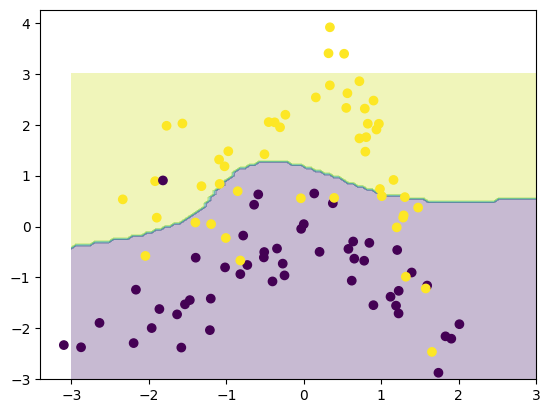

In [5]:
# Q24. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary

from sklearn.datasets import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

X, y = make_classification(n_features=2, n_redundant=0)
model = SVC(kernel='poly', degree=3)
model.fit(X, y)

xx, yy = np.meshgrid(np.linspace(-3,3,100), np.linspace(-3,3,100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()


In [6]:
# Q25. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
# This variant is used because the features are continuous and assumed to follow a normal distribution.
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

Model Accuracy: 97.37%

Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.93      0.96        43
      benign       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [7]:
# Q26. Write a Python program to train a Multinomial Naive Bayes classifier for text classification using the 20 Newsgroups dataset.
# Import required libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset (subsetting for specific categories for speed)
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
train_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
test_data = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

# Build a Pipeline
# TfidfVectorizer: Converts text to a matrix of TF-IDF features (word frequencies)
# MultinomialNB: The classifier suited for discrete word counts
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
model.fit(train_data.data, train_data.target)

# Predict and Evaluate
predicted_categories = model.predict(test_data.data)

print(f"Accuracy: {accuracy_score(test_data.target, predicted_categories) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(test_data.target, predicted_categories, target_names=test_data.target_names))

Accuracy: 83.49%

Classification Report:
                        precision    recall  f1-score   support

           alt.atheism       0.97      0.60      0.74       319
         comp.graphics       0.96      0.89      0.92       389
               sci.med       0.97      0.81      0.88       396
soc.religion.christian       0.65      0.99      0.78       398

              accuracy                           0.83      1502
             macro avg       0.89      0.82      0.83      1502
          weighted avg       0.88      0.83      0.84      1502



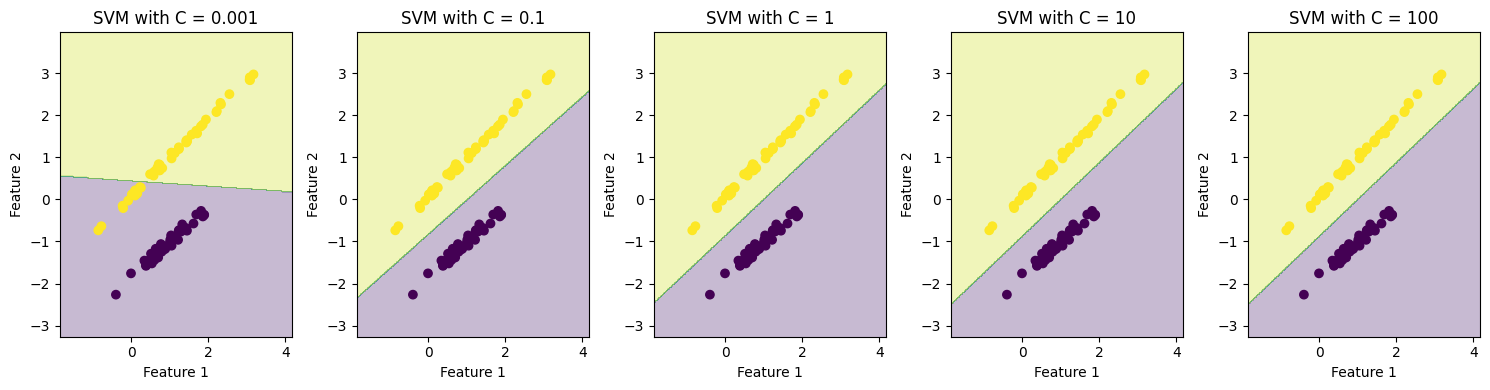

In [8]:
# Q27. Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Create a 2D dataset for visualization
X, y = make_classification(
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42
)

# Different C values to compare
C_values = [0.001, 0.1, 1, 10, 100]

# Create mesh grid for decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# Plot decision boundaries
plt.figure(figsize=(15, 4))

for i, C in enumerate(C_values, 1):
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(1, 5, i)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title(f"SVM with C = {C}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()


In [9]:
# Q28. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features.

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generate a synthetic dataset with binary features
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=0, random_state=42)

# Bernoulli NB expects binary input. We binarize our continuous synthetic data
# using a threshold (e.g., values > 0 become 1, else 0).
X_binary = (X > 0).astype(int)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.2, random_state=42)

# Initialize and train the Bernoulli Naïve Bayes classifier
# binarize=None because we manually pre-processed the data above
bnb = BernoulliNB(binarize=None)
bnb.fit(X_train, y_train)

# Predict and Evaluate
y_pred = bnb.predict(X_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 67.00%

Confusion Matrix:
[[70 34]
 [32 64]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       104
           1       0.65      0.67      0.66        96

    accuracy                           0.67       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.67      0.67      0.67       200



In [10]:
# Q29. Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data.

import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Training on Unscaled Data ---
svm_unscaled = SVC(kernel='rbf', C=1.0)
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

# Training on Scaled Data ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_scaled = SVC(kernel='rbf', C=1.0)
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

# Compare Results
print(f"Accuracy without scaling: {acc_unscaled * 100:.2f}%")
print(f"Accuracy with scaling:    {acc_scaled * 100:.2f}%")

Accuracy without scaling: 68.52%
Accuracy with scaling:    98.15%


In [11]:
# Q30. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing.

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Gaussian NB with almost NO smoothing (very small var_smoothing) ---
# Default is 1e-9. Here we make it negligible to simulate "before" smoothing.
gnb_no_smooth = GaussianNB(var_smoothing=1e-15)
gnb_no_smooth.fit(X_train, y_train)
y_pred_no_smooth = gnb_no_smooth.predict(X_test)

# Gaussian NB with HIGH smoothing (simulating "after" smoothing) ---
gnb_smooth = GaussianNB(var_smoothing=0.1) # Adding 10% of max variance
gnb_smooth.fit(X_train, y_train)
y_pred_smooth = gnb_smooth.predict(X_test)

# Compare Results
print(f"Accuracy with minimal smoothing (1e-15): {accuracy_score(y_test, y_pred_no_smooth)*100:.2f}%")
print(f"Accuracy with high smoothing (0.1):      {accuracy_score(y_test, y_pred_smooth)*100:.2f}%")

# Check for differences in specific predictions
differences = np.where(y_pred_no_smooth != y_pred_smooth)[0]
print(f"\nNumber of prediction changes after smoothing: {len(differences)}")

Accuracy with minimal smoothing (1e-15): 97.78%
Accuracy with high smoothing (0.1):      100.00%

Number of prediction changes after smoothing: 1


In [12]:
# Q31. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel).
# import require library
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_iris

# Load and split data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}

# Initialize GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0, cv=5)
grid.fit(X_train, y_train)

# Output the best parameters found
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Score: {grid.best_score_:.4f}")
print(f"Test Set Accuracy: {grid.score(X_test, y_test):.4f}")

Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Best Score: 0.9583
Test Set Accuracy: 1.0000


In [13]:
# Q32. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy.

from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Create an imbalanced dataset (90% class 0, 10% class 1)
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], flip_y=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standard SVM (No weighting)
model_standard = SVC(kernel='linear')
model_standard.fit(X_train, y_train)
y_pred_std = model_standard.predict(X_test)

# SVM with Balanced Class Weights
model_weighted = SVC(kernel='linear', class_weight='balanced')
model_weighted.fit(X_train, y_train)
y_pred_weight = model_weighted.predict(X_test)

print("Standard SVM Accuracy:", accuracy_score(y_test, y_pred_std))
print("Weighted SVM Accuracy:", accuracy_score(y_test, y_pred_weight))
print("\nWeighted SVM Classification Report:\n", classification_report(y_test, y_pred_weight))

Standard SVM Accuracy: 0.94
Weighted SVM Accuracy: 0.86

Weighted SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.92       275
           1       0.35      0.76      0.47        25

    accuracy                           0.86       300
   macro avg       0.66      0.81      0.70       300
weighted avg       0.92      0.86      0.88       300



In [14]:
# Q33. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Sample email data
emails = ["Free money now!", "Hi, are we meeting for lunch?", "Exclusive offer for you", "Project update attached"]
labels = [1, 0, 1, 0]  # 1 = Spam, 0 = Ham

# Vectorize text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)

# Train Multinomial NB
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25, random_state=42)
nb_spam = MultinomialNB()
nb_spam.fit(X_train, y_train)

# Test on new email
sample_email = ["Get rich quick with this offer"]
sample_vec = vectorizer.transform(sample_email)
prediction = nb_spam.predict(sample_vec)
print(f"Prediction for '{sample_email[0]}': {'Spam' if prediction[0] == 1 else 'Ham'}")

Prediction for 'Get rich quick with this offer': Spam


In [15]:
# Q34. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# Load and scale data (scaling is critical for SVM)
data = load_breast_cancer()
scaler = StandardScaler()
X = scaler.fit_transform(data.data)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM
svm_model = SVC(kernel='rbf', C=1.0).fit(X_train, y_train)
svm_acc = accuracy_score(y_test, svm_model.predict(X_test))

# Train Naive Bayes
nb_model = GaussianNB().fit(X_train, y_train)
nb_acc = accuracy_score(y_test, nb_model.predict(X_test))

print(f"SVM Accuracy: {svm_acc:.4f}")
print(f"Naive Bayes Accuracy: {nb_acc:.4f}")

SVM Accuracy: 0.9708
Naive Bayes Accuracy: 0.9357


In [17]:
# Q35. Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results.

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score

# Load the Wine dataset
data = load_wine()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes with all features
nb_all = GaussianNB()
nb_all.fit(X_train, y_train)
y_pred_all = nb_all.predict(X_test)
acc_all = accuracy_score(y_test, y_pred_all)

# Naive Bayes with Feature Selection(Top 5 features)
# We use chi2 test which is common for testing independence between features and classes
selector = SelectKBest(score_func=chi2, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

nb_selected = GaussianNB()
nb_selected.fit(X_train_selected, y_train)
y_pred_selected = nb_selected.predict(X_test_selected)
acc_selected = accuracy_score(y_test, y_pred_selected)

# Compare Results
print(f"Number of original features: {X.shape[1]}")
print(f"Accuracy with all features:      {acc_all * 100:.2f}%")
print(f"Accuracy with top 5 features:    {acc_selected * 100:.2f}%")

selected_mask = selector.get_support()
selected_names = [data.feature_names[i] for i, selected in enumerate(selected_mask) if selected]
print(f"\nSelected Features: {selected_names}")

Number of original features: 13
Accuracy with all features:      100.00%
Accuracy with top 5 features:    96.30%

Selected Features: ['alcalinity_of_ash', 'magnesium', 'flavanoids', 'color_intensity', 'proline']


In [19]:
# Q36. Write a Python program to train an SVM Classifier using OneVsRest(OvR) and OneVsOne(OvO) strategies on the Wine dataset and compare their accuracy.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset
wine = datasets.load_wine()
X, y = wine.data, wine.target

# Scaling is essential for SVM performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# OneVsRest(OvR)
# Most common for algorithms like Logistic Regression
ovr_clf = OneVsRestClassifier(SVC(kernel='linear', random_state=42))
ovr_clf.fit(X_train, y_train)
y_pred_ovr = ovr_clf.predict(X_test)
acc_ovr = accuracy_score(y_test, y_pred_ovr)

# OneVsOne(OvO)
# Often the default for SVM (SVC) in scikit-learn
ovo_clf = OneVsOneClassifier(SVC(kernel='linear', random_state=42))
ovo_clf.fit(X_train, y_train)
y_pred_ovo = ovo_clf.predict(X_test)
acc_ovo = accuracy_score(y_test, y_pred_ovo)

# Compare Accuracy
print(f"OneVsRest(OvR) Accuracy: {acc_ovr * 100:.2f}%")
print(f"OneVsOne(OvO) Accuracy:  {acc_ovo * 100:.2f}%")

'''
--> Note: In scikit-learn, SVC's decision_function_shape defaults to 'ovr',
    but it uses 'ovo' internally for training the actual binary classifiers.
'''

OneVsRest(OvR) Accuracy: 98.15%
OneVsOne(OvO) Accuracy:  98.15%


"\n--> Note: In scikit-learn, SVC's decision_function_shape defaults to 'ovr', \n    but it uses 'ovo' internally for training the actual binary classifiers.\n"

In [20]:
# Q37. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load and Scale data (Standardization is mandatory for SVM)
data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

kernels = ['linear', 'poly', 'rbf']
for k in kernels:
    clf = SVC(kernel=k, gamma='auto') # gamma auto handles RBF/Poly scaling
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    print(f"Accuracy with {k.capitalize()} Kernel: {acc:.4f}")

Accuracy with Linear Kernel: 0.9766
Accuracy with Poly Kernel: 0.8947
Accuracy with Rbf Kernel: 0.9708


In [22]:
# Q38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy.

'''
Stratified K-Fold ensures that each fold maintains the same percentage of samples for each class as the complete set.
'''
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# SVM classifier
model = SVC(kernel='rbf')

accuracies = []

# Cross-validation loop
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train and evaluate
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Average accuracy
print("Accuracies for each fold:", accuracies)
print("Average Accuracy:", np.mean(accuracies))



Accuracies for each fold: [0.9736842105263158, 0.9824561403508771, 0.9736842105263158, 0.9736842105263158, 0.9823008849557522]
Average Accuracy: 0.9771619313771154


In [23]:
# Q39. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance.

from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Naive Bayes with default priors
nb_default = GaussianNB()
nb_default.fit(X_train, y_train)
acc_default = accuracy_score(y_test, nb_default.predict(X_test))

# Naive Bayes with custom priors
# for example assume both classes are equally likely
nb_custom = GaussianNB(priors=[0.5, 0.5])
nb_custom.fit(X_train, y_train)
acc_custom = accuracy_score(y_test, nb_custom.predict(X_test))

# Results
print("Accuracy with default priors:", acc_default)
print("Accuracy with custom priors :", acc_custom)


Accuracy with default priors: 0.9415204678362573
Accuracy with custom priors : 0.9415204678362573


In [24]:
# Q40. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM WITHOUT RFE
svm_full = SVC(kernel='linear')
svm_full.fit(X_train_scaled, y_train)
y_pred_full = svm_full.predict(X_test_scaled)
acc_full = accuracy_score(y_test, y_pred_full)

# SVM WITH RFE
svm_rfe_base = SVC(kernel='linear')
rfe = RFE(estimator=svm_rfe_base, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

svm_rfe = SVC(kernel='linear')
svm_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = svm_rfe.predict(X_test_rfe)
acc_rfe = accuracy_score(y_test, y_pred_rfe)

# Results
print("Accuracy without RFE:", acc_full)
print("Accuracy with RFE   :", acc_rfe)


Accuracy without RFE: 0.9649122807017544
Accuracy with RFE   : 0.9736842105263158


In [25]:
# Q41. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy.

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM classifier
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

# Predictions
y_pred = svm.predict(X_test)

# Evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall   :", recall)
print("F1-Score :", f1)


Precision: 0.9814814814814815
Recall   : 0.9814814814814815
F1-Score : 0.9814814814814815


In [26]:
# Q42. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss).

from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train Naïve Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predicted probabilities
y_prob = nb.predict_proba(X_test)

# Log Loss (Cross-Entropy Loss)
loss = log_loss(y_test, y_prob)

print("Log Loss:", loss)


Log Loss: 0.48986013210958873


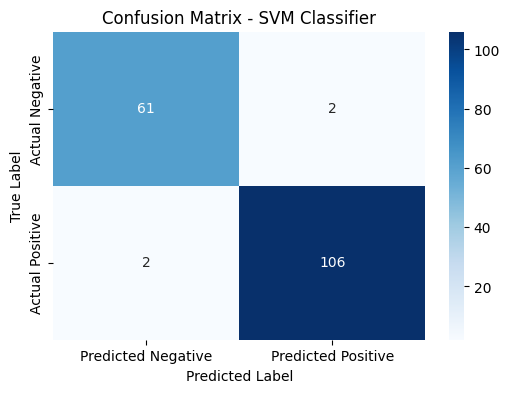

In [27]:
# Q43. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM classifier
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

# Predictions
y_pred = svm.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Predicted Negative', 'Predicted Positive'],
    yticklabels=['Actual Negative', 'Actual Positive']
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM Classifier")
plt.show()


In [28]:
# Q44. Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE.

from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# Load housing dataset
X, y = fetch_california_housing(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Feature scaling (important for SVR)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predictions
y_pred = svr.predict(X_test)

# Mean Absolute Error
MAE = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", MAE)


Mean Absolute Error (MAE): 0.3972059291578809


In [29]:
# Q45.  Write a Python program to train a Naive Bayes classifier and evaluate its performance using the ROC-AUC score.

from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predicted probabilities for positive class
y_prob = nb.predict_proba(X_test)[:, 1]

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)

print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9922104644326867


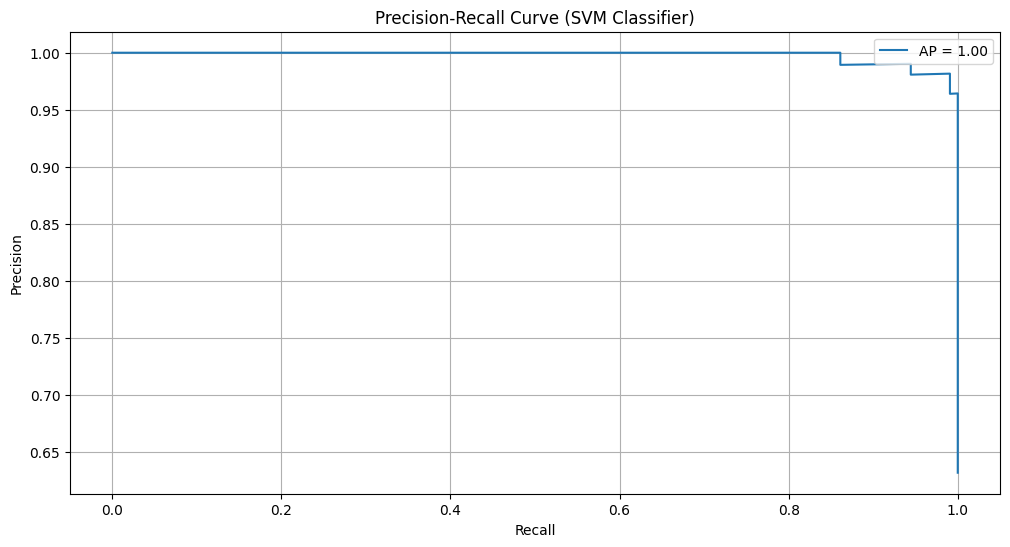

In [31]:
# Q46. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, average_precision_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM classifier (probability=True is required)
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)

# Get probability scores for positive class
y_scores = svm.predict_proba(X_test)[:, 1]

# Precision-Recall values
precision, recall, _ = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

# Plot Precision-Recall Curve
plt.figure(figsize=(12, 6))
plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (SVM Classifier)")
plt.legend()
plt.grid()
plt.show()
